# Demonstration of the functionality of the ``polar_models'' module

TODO

In [1]:
# import some general scientific Python libraries
import matplotlib.pyplot as plt
import numpy as np

# import required PyRockWave modules
import elastic_database as edb
import polar_models as pm
import coordinates as c

In [2]:
chl = edb.chlorite()
chl

<class 'ElasticClass.ElasticProps'>

Mineral Name: Chlorite
Reference Source: https://doi.org/10.1002/2014GL059334
Crystal System: Monoclinic
Pressure (GPa): 0.0
Temperature (°C): 25
Density (g/cm3): 2.534

Elastic Tensor (Cij) in GPa:
[[197.8  60.7  21.1   0.    3.3   0. ]
 [ 60.7 202.3  34.1   0.    0.2   0. ]
 [ 21.1  34.1 135.1   0.    0.4   0. ]
 [  0.    0.    0.   24.5   0.    0.1]
 [  3.3   0.2   0.4   0.   24.4   0. ]
 [  0.    0.    0.    0.1   0.   70.3]]

Calculated average properties:
Bulk Modulus (GPa) → VRH, (Reuss, Voigt)
82.553, (79.883, 85.222)

Shear Modulus (GPa) → VRH, (Reuss, Voigt)
45.772, (39.751, 51.793)

Isotropic Poisson Ratio → VRH, (Reuss, Voigt)
0.266, (0.287, 0.247))

Pugh's ratio → VRH, (Reuss, Voigt)
(1.804, (2.010, 1.645)

Anisotropy indexes
Universal Elastic Anisotropy: 1.581
Kube's Anisotropy Index (proportional): 0.595

Isotropic seismic properties → VRH, (Reuss, Voigt)
Vp (km/s): 7.527, (7.242, 7.803)
Vs (km/s): 4.250, (3.961, 4.521)
Vp/Vs: 1.771, 

In [3]:
# generate a set of wavevectors
wavevectors = c.equispaced_S2_grid(n=60000, hemisphere='upper')

In [4]:
# calculate polar models
model1 = pm.weak_polar_anisotropy(chl, wavevectors)
model2 = pm.polar_anisotropy(chl, wavevectors)

model1

,polar_ang,azimuthal_ang,Vp,Vsv,Vsh
0,0.000000,0.000000,7.301706,3.109423,3.109423
1,0.028863,0.000000,7.299643,3.117581,3.111843
2,0.029435,3.883222,7.299561,3.117907,3.111940
3,0.029995,1.483259,7.299479,3.118233,3.112037
4,0.030546,5.366481,7.299396,3.118559,3.112133
...,...,...,...,...,...
59995,1.570721,2.080495,8.996070,3.109423,6.015781
59996,1.570738,5.963717,8.996070,3.109423,6.015781
59997,1.570755,3.563754,8.996070,3.109423,6.015781
59998,1.570771,1.163791,8.996070,3.109423,6.015781


## Plot Vp as a function of orientation

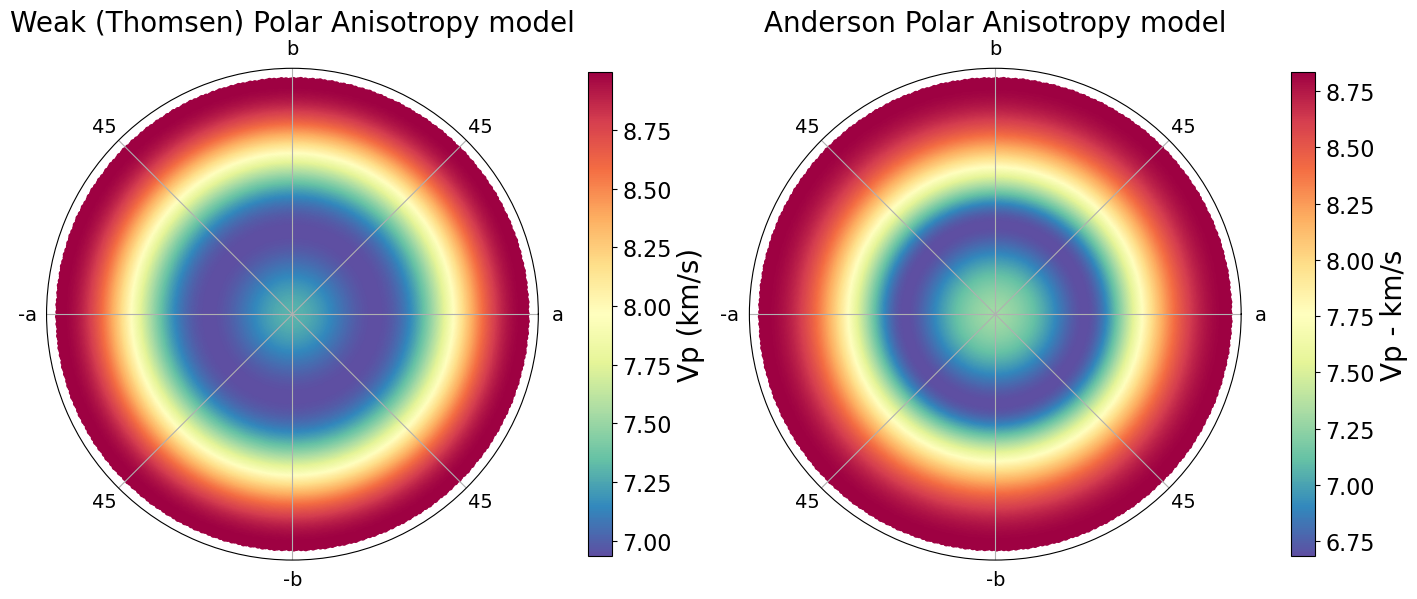

In [5]:
fig, (ax1, ax2) = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, ncols=2, figsize=(14,7))

# Model 1
ax1.set_theta_direction(-1)
ax1.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax1.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax1.set_yticks([])
ax1.set_title('Weak (Thomsen) Polar Anisotropy model', fontsize=20)

cm = ax1.scatter(model1['azimuthal_ang'],
                 model1['polar_ang'],
                 c=model1['Vp'],
                 s=15,
                 cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax1, shrink=0.7, location='right')
cbar.set_label('Vp (km/s)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

# Model 2
ax2.set_theta_direction(-1)
ax2.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax2.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax2.set_yticks([])
ax2.set_title('Anderson Polar Anisotropy model', fontsize=20)

cm = ax2.scatter(model2['azimuthal_ang'],
                 model2['polar_ang'],
                 c=model2['Vp'],
                 s=15,
                 cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax2, shrink=0.7, location='right')
cbar.set_label('Vp - km/s', fontsize=20)
cbar.ax.tick_params(labelsize=16)

## Plot Vs1 and Vs2 as a function of orientation

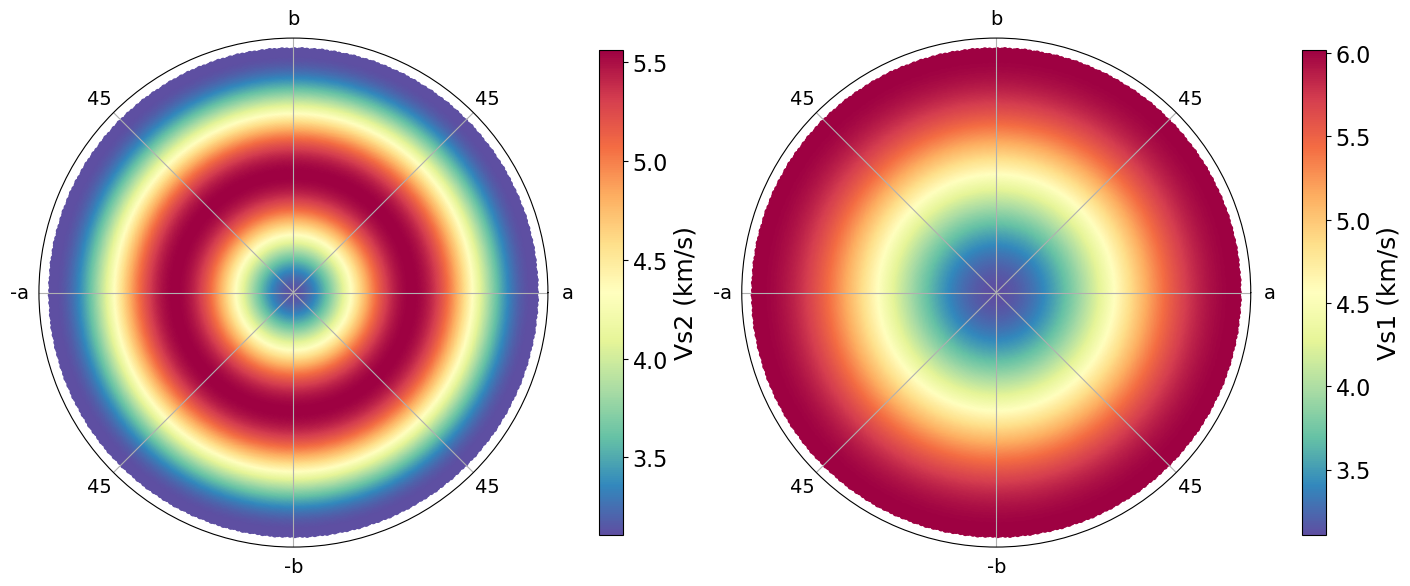

In [6]:
fig2, (ax1, ax2) = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, ncols=2, figsize=(14,7))

# VS2 (slow)
ax1.set_theta_direction(-1)
ax1.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax1.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax1.set_yticks([])

cm = ax1.scatter(model1['azimuthal_ang'],
                 model1['polar_ang'],
                 c=model1['Vsv'],
                 s=15,
                 cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax1, shrink=0.7, location='right')
cbar.set_label('Vs2 (km/s)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

# VS1 (fast)
ax2.set_theta_direction(-1)
ax2.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax2.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax2.set_yticks([])

cm = ax2.scatter(model1['azimuthal_ang'],
                 model1['polar_ang'],
                 c=model1['Vsh'],
                 s=15,
                 cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax2, shrink=0.7, location='right')
cbar.set_label('Vs1 (km/s)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

In [8]:
import sys
import matplotlib as mpl
from datetime import date    
today = date.today().isoformat()

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Numpy', np.__version__)
print('Matplotlib', mpl.__version__)

Notebook tested in 2023-07-27 using:
Python 3.10.12 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 19:09:20) [MSC v.1916 64 bit (AMD64)]
Numpy 1.25.0
Matplotlib 3.7.1
